In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
(x_train,y_train),(x_test,y_test) =mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)
x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy is",test_acc,"only")
predictions=model.predict(x_test[:10])

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9871 - loss: 0.0610 - val_accuracy: 0.9991 - val_loss: 0.0026
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9983 - loss: 0.0035 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9993 - loss: 0.0015 - val_accuracy: 0.9991 - val_loss: 0.0018
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9999 - loss: 6.8275e-04 - val_accuracy: 0.9991 - val_loss: 0.0026
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9997 - loss: 6.6750e-04 - val_accuracy: 0.9995 - val_loss: 0.0040
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 4.5376e-04 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.7918e-05 - val_accuracy: 0.9995 - val_loss: 0.0038
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9992 - loss: 0.0027 - 

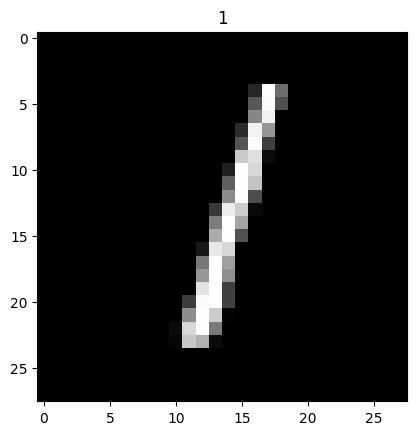

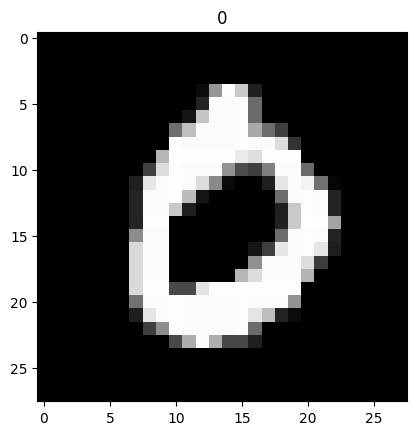

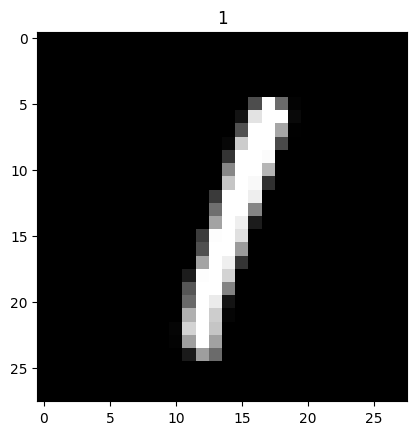

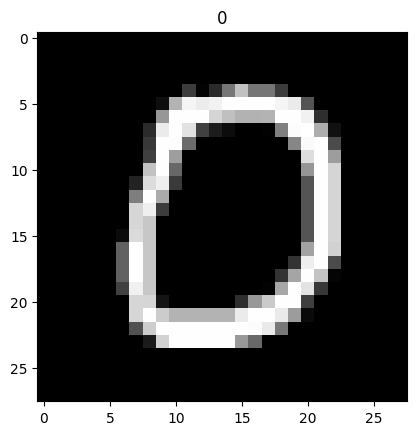

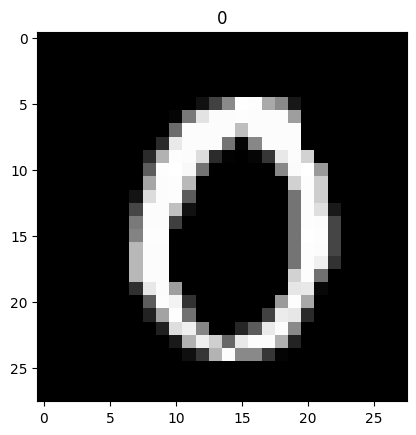

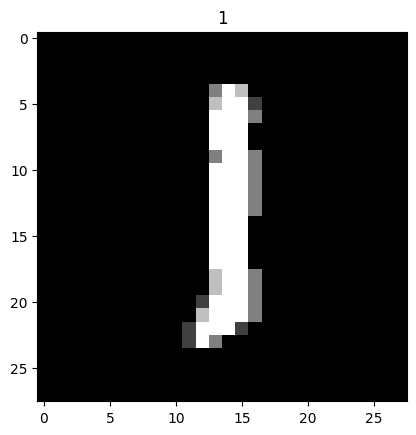

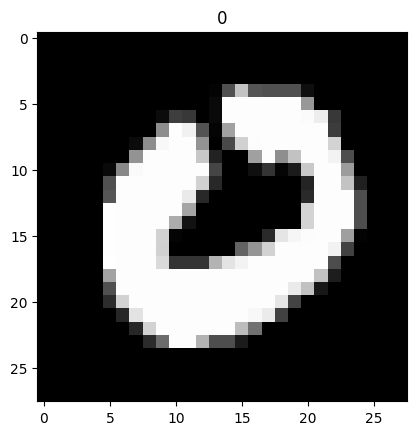

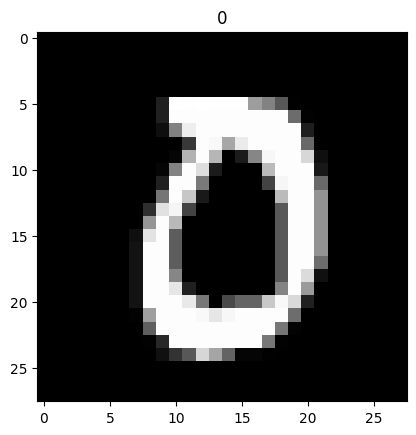

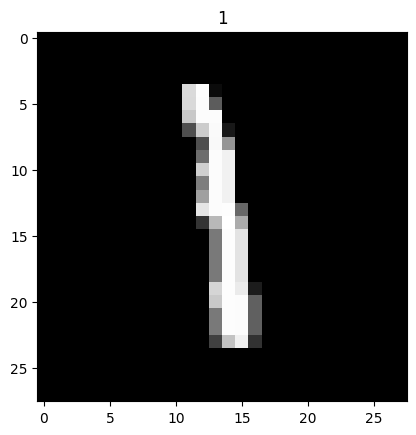

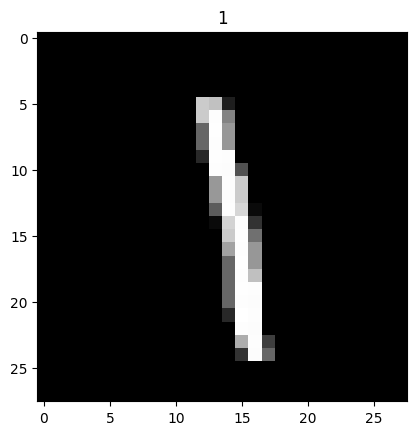

In [7]:
for i in range(10):
  plt.imshow(x_test[i], cmap='gray')
  predicted_label=round(predictions[i][0])
  plt.title(predicted_label)
  plt.show()